In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset from Kaggle

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download saurabhshahane/spotgen-music-dataset/versions/122

100% 274M/274M [00:04<00:00, 74.5MB/s]
100% 274M/274M [00:04<00:00, 68.6MB/s]


In [ ]:
!unzip spotgen-music-dataset.zip -d data

Archive:  spotgen-music-dataset.zip
  inflating: data/SpotGenTrack/Data Sources/spotify_albums.csv  
  inflating: data/SpotGenTrack/Data Sources/spotify_artists.csv  
  inflating: data/SpotGenTrack/Data Sources/spotify_tracks.csv  
  inflating: data/SpotGenTrack/Features Extracted/low_level_audio_features.csv  
  inflating: data/SpotGenTrack/Features Extracted/lyrics_features.csv  


# Read data

In [ ]:
tracks_dataset=pd.read_csv("data/SpotGenTrack/Data Sources/spotify_tracks.csv")

In [ ]:
tracks_dataset.shape

(101939, 32)

In [ ]:
tracks_dataset.head()

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [ ]:
tracks_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,101939.0,50969.000000,29427.398883,0.0,25484.5000,50969.000000,76453.5000,101938.000
acousticness,101939.0,0.352124,0.334855,0.0,0.0407,0.238000,0.6450,0.996
danceability,101939.0,0.586015,0.177724,0.0,0.4800,0.610000,0.7140,0.989
disc_number,101939.0,1.032166,0.566789,1.0,1.0000,1.000000,1.0000,81.000
duration_ms,101939.0,246770.803304,190430.295141,1155.0,184000.0000,216893.000000,261055.0000,5505831.000
energy,101939.0,0.586479,0.260170,0.0,0.4110,0.629000,0.7980,1.000
instrumentalness,101939.0,0.148776,0.304024,0.0,0.0000,0.000037,0.0344,1.000
key,101939.0,5.270858,3.577679,0.0,2.0000,5.000000,8.0000,11.000
liveness,101939.0,0.197640,0.175391,0.0,0.0956,0.124000,0.2410,0.999
loudness,101939.0,-9.462720,6.198508,-60.0,-11.1490,-7.599000,-5.5090,2.719


In [ ]:
data=tracks_dataset[:10000]

# Analyze

In [ ]:
data.shape

(10000, 32)

In [ ]:
data.columns

Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

array([[<Axes: xlabel='danceability', ylabel='danceability'>,
        <Axes: xlabel='energy', ylabel='danceability'>,
        <Axes: xlabel='instrumentalness', ylabel='danceability'>,
        <Axes: xlabel='liveness', ylabel='danceability'>,
        <Axes: xlabel='loudness', ylabel='danceability'>,
        <Axes: xlabel='popularity', ylabel='danceability'>,
        <Axes: xlabel='tempo', ylabel='danceability'>,
        <Axes: xlabel='valence', ylabel='danceability'>],
       [<Axes: xlabel='danceability', ylabel='energy'>,
        <Axes: xlabel='energy', ylabel='energy'>,
        <Axes: xlabel='instrumentalness', ylabel='energy'>,
        <Axes: xlabel='liveness', ylabel='energy'>,
        <Axes: xlabel='loudness', ylabel='energy'>,
        <Axes: xlabel='popularity', ylabel='energy'>,
        <Axes: xlabel='tempo', ylabel='energy'>,
        <Axes: xlabel='valence', ylabel='energy'>],
       [<Axes: xlabel='danceability', ylabel='instrumentalness'>,
        <Axes: xlabel='energy', ylab

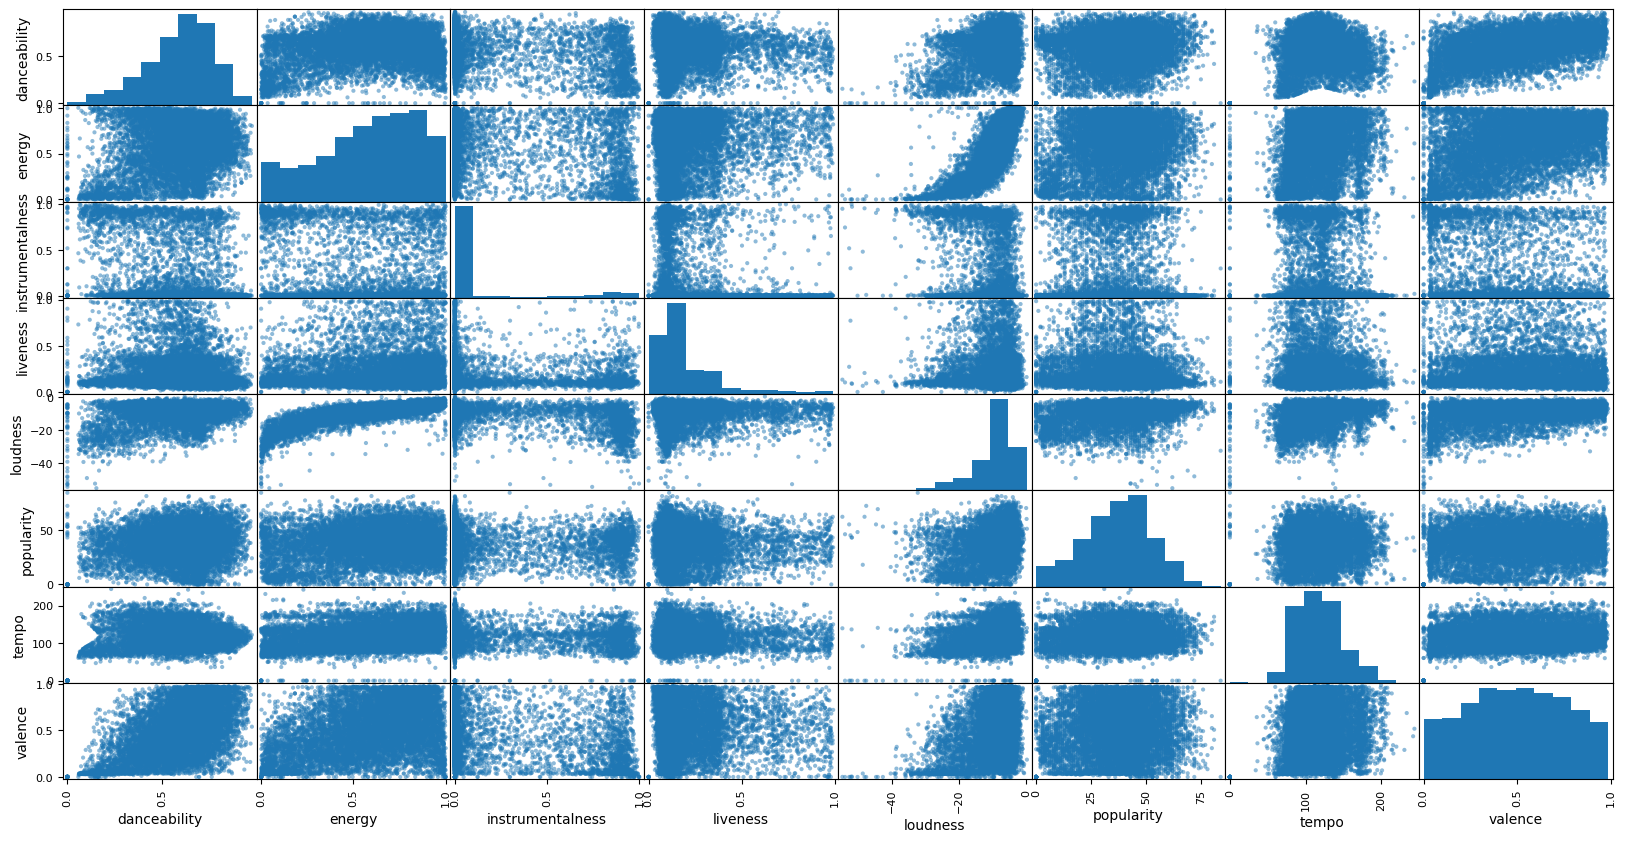

In [ ]:
pd.plotting.scatter_matrix(data[['danceability','energy','instrumentalness','liveness','loudness','popularity','tempo','valence']],figsize=(20,10))

In [ ]:
data[['danceability','energy','instrumentalness','liveness','loudness','popularity','tempo','valence']].corr()

,danceability,energy,instrumentalness,liveness,loudness,popularity,tempo,valence
danceability,1.000000,0.226966,-0.316416,-0.064342,0.331885,0.100775,0.007227,0.537785
energy,0.226966,1.000000,-0.240188,0.150993,0.801738,0.199503,0.228413,0.400088
instrumentalness,-0.316416,-0.240188,1.000000,-0.106208,-0.391142,-0.029699,-0.063351,-0.333431
liveness,-0.064342,0.150993,-0.106208,1.000000,0.031447,-0.053053,-0.036825,0.036821
loudness,0.331885,0.801738,-0.391142,0.031447,1.000000,0.268348,0.245093,0.375614
popularity,0.100775,0.199503,-0.029699,-0.053053,0.268348,1.000000,0.082700,0.075563
tempo,0.007227,0.228413,-0.063351,-0.036825,0.245093,0.082700,1.000000,0.112706
valence,0.537785,0.400088,-0.333431,0.036821,0.375614,0.075563,0.112706,1.000000


In [ ]:
data[['danceability','energy','instrumentalness','liveness','loudness','popularity','tempo','valence']].head()

,danceability,energy,instrumentalness,liveness,loudness,popularity,tempo,valence
0,0.698,0.606,0.000003,0.151,-7.447,28.0,115.018,0.6220
1,0.719,0.308,0.000000,0.253,-10.340,31.0,115.075,0.5890
2,0.466,0.931,0.000000,0.938,-13.605,31.0,79.565,0.0850
3,0.719,0.126,0.000000,0.113,-20.254,14.0,112.822,0.5330
4,0.460,0.942,0.000000,0.917,-13.749,32.0,81.260,0.0906


# Training

In [ ]:
model=KMeans(n_clusters=5)

In [ ]:
X=data[['danceability','energy','instrumentalness','liveness','loudness','popularity','tempo','valence']]

In [ ]:
X

,danceability,energy,instrumentalness,liveness,loudness,popularity,tempo,valence
0,0.698,0.6060,0.000003,0.1510,-7.447,28.0,115.018,0.6220
1,0.719,0.3080,0.000000,0.2530,-10.340,31.0,115.075,0.5890
2,0.466,0.9310,0.000000,0.9380,-13.605,31.0,79.565,0.0850
3,0.719,0.1260,0.000000,0.1130,-20.254,14.0,112.822,0.5330
4,0.460,0.9420,0.000000,0.9170,-13.749,32.0,81.260,0.0906
...,...,...,...,...,...,...,...,...
9995,0.181,0.1090,0.884000,0.1080,-18.910,9.0,73.129,0.0910
9996,0.741,0.8240,0.931000,0.1110,-9.688,25.0,131.012,0.0593
9997,0.320,0.8320,0.004750,0.3690,-4.856,52.0,156.331,0.1750
9998,0.656,0.0576,0.000000,0.3090,-26.049,1.0,110.623,0.4130


In [ ]:
model.fit(X)

KMeans(n_clusters=5)

In [ ]:
model.labels_[:10]

array([0, 0, 4, 0, 4, 3, 4, 4, 4, 4], dtype=int32)

In [ ]:
min((model.labels_)),max(model.labels_)

(0, 4)

# Edit df

In [ ]:
data['label']=model.labels_

In [ ]:
data.head()

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type,label
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track,0
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track,0
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track,4
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track,0
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track,4


# Save df as csv

In [ ]:
data.to_csv("labeled_data.csv")

# Recommendation

get 5 random id

In [ ]:
import random

In [ ]:
ids=""
for i in range(5):
  random_id=random.randint(0,len(data))
  ids+=data.iloc[random_id]['id']+"\n"

In [ ]:
ids

'3gvuZEfT5eKjyy8hycOIWy\n1ffHMFXSsQ2E9he6SL3uLT\n58QDB1sKe1wHZEvngevtGE\n1TKBi2952INTsKvN78sTRz\n6Ri9UCon5eF07GqlNDk98L\n'

In [ ]:
ids=ids.strip().split('\n')

In [ ]:
favorites = data[data.id.isin(ids)]

In [ ]:
cluster_numbers = list(favorites['label'])
clusters = {}
for num in cluster_numbers:
  clusters[num] = cluster_numbers.count(num)

In [ ]:
clusters

{3: 2, 2: 2, 4: 1}

In [ ]:
user_favorite_cluster = [(k, v) for k, v in sorted(clusters.items(), key=lambda item: item[1])][-1][0]
print('\nFavorite cluster:', user_favorite_cluster, '\n')


Favorite cluster: 2 



In [ ]:
suggestions = data[data.label == user_favorite_cluster]

suggestions.head()

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type,label
10,10,0.1010,7noNViHJAYZ3UxlhDNKAt9,https://api.spotify.com/v1/audio-analysis/01zM...,"['3FLUBwpAnaIlIKeaBfsxFe', '5r5Va4lVQ1zjEfbJSr...","['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.748,1.0,237667.0,...,0.0833,114.982,4.0,https://api.spotify.com/v1/tracks/01zME4q62SDP...,track_42,1.0,spotify:track:01zME4q62SDPtD0hOSmTrG,0.3590,track,2
20,20,0.4710,3Pw2DsAYlat4wHjVrQHYhT,https://api.spotify.com/v1/audio-analysis/0tew...,['3EQ310YOzcS1pJqiaoDs32'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.515,1.0,261123.0,...,0.0385,139.926,4.0,https://api.spotify.com/v1/tracks/0tewjlNbotxq...,track_47,1.0,spotify:track:0tewjlNbotxqF2obibsg36,0.0383,track,2
56,56,0.7610,42nsomRaEURVkNt7IF1IFu,https://api.spotify.com/v1/audio-analysis/4a2u...,['13ZEDW6vyBF12HYcZRr4EV'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.488,1.0,204000.0,...,0.0555,150.028,3.0,https://api.spotify.com/v1/tracks/4a2uqVlpRChH...,track_2,1.0,spotify:track:4a2uqVlpRChHj32EjJLu7G,0.4020,track,2
60,60,0.3960,3a4JKmTo2VzXrRK7Bc4dDp,https://api.spotify.com/v1/audio-analysis/2cCT...,['4oYolWgvQmCnjrvVNTymlf'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.525,1.0,264010.0,...,0.0901,120.006,4.0,https://api.spotify.com/v1/tracks/2cCTwi9uLomF...,track_4,3.0,spotify:track:2cCTwi9uLomFcpWF0IaJW5,0.4280,track,2
76,76,0.0989,4kb7xzUBjlQh8pvN6A4UBc,https://api.spotify.com/v1/audio-analysis/3Fae...,"['1NpKmfDYMhw1KJIIUCsX4O', '0Swkha61RB6f6xVAwy...","['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.749,1.0,191592.0,...,0.1040,119.956,4.0,https://api.spotify.com/v1/tracks/3FaeRwOahQ8D...,track_25,1.0,spotify:track:3FaeRwOahQ8DyY1fSg6HO1,0.2640,track,2
